In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time


In [23]:
#from sm.tsa.statespace import sa
df1 = pd.read_excel("C:/Users/SONY/Downloads/CocaCola_Sales_Rawdata.xlsx")




C:\Users\SONY\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

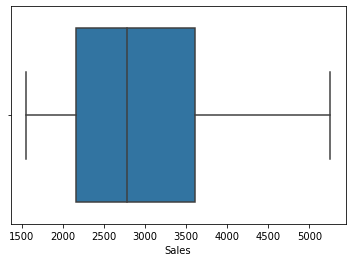

In [24]:
# Boxplot for ever
sns.boxplot("Sales",data=df1)


In [6]:

#sns.factorplot("Quarter","Sales",data=cocola,kind="box")



In [35]:
rolmean=df1.rolling(window=12).mean()
rolstd=df1.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

C:\Users\SONY\AppData\Local\Temp\ipykernel_1720\868431022.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Quarter'], dtype='object')
  rolmean=df1.rolling(window=12).mean()
C:\Users\SONY\AppData\Local\Temp\ipykernel_1720\868431022.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Quarter'], dtype='object')
  rolstd=df1.rolling(window=12).std()


          Sales
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11  2055.393998
12  2070.042081
13  2077.225747
14  2049.954497
         Sales
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  261.256519
12  246.139429
13  252.874401
14  213.783151


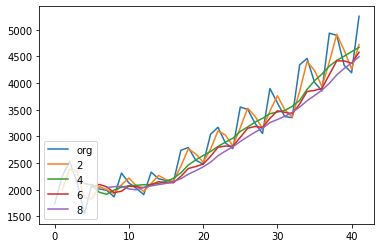

In [25]:
# moving average for the time series to understand better about the trend character in Amtrak
df1.Sales.plot(label="org")
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)


In [40]:
from pandas import read_csv
df1 = read_csv('C:/Users/SONY/Downloads/CocaCola_Sales_Rawdata.csv', header=0, index_col=0)
X = df1
split =round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=2190.682807, mean2=3798.023809
variance1=97608.117694, variance2=506545.822581


In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

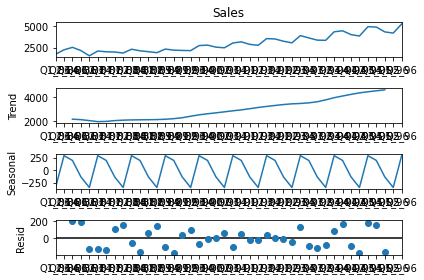

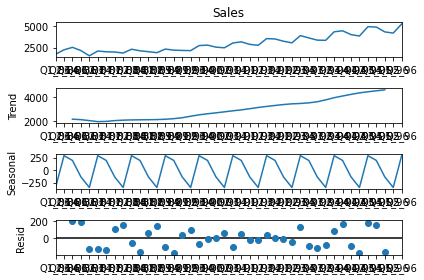

In [111]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(x=df1.Sales,model="additive",period=4)
decompose_ts_add.plot()




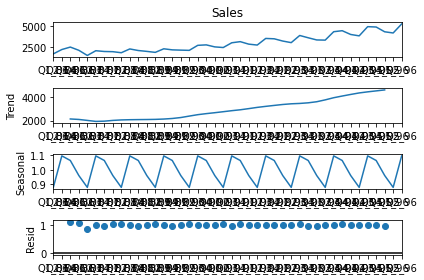

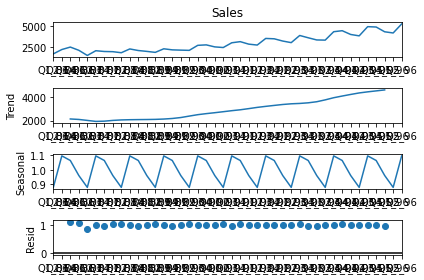

In [107]:
decompose_ts_mul = seasonal_decompose(x=df1.Sales,model="multiplicative",period=4)
decompose_ts_mul.plot()

C:\Users\SONY\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


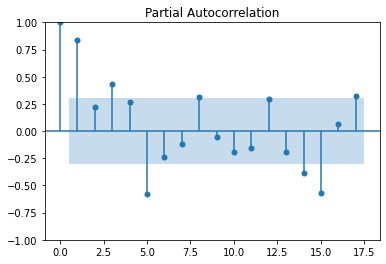

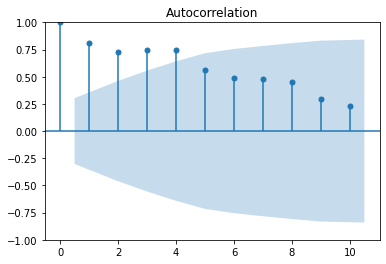

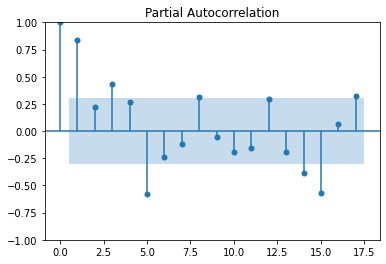

In [27]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(df1.Sales,lags=10)
tsa_plots.plot_pacf(df1.Sales)



In [10]:
# Amtrak.index.freq = "MS" 
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 


In [179]:

Train = df1.head(48)
Test =df1.tail(12)
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13),inplace=True)



In [180]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)




In [114]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) # 9.76



9.681026212920154

In [115]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) # 9.82





11.025181470208542

In [116]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)# 3.10





3.43164500885638

In [117]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) # 2.35





2.6521595903043447

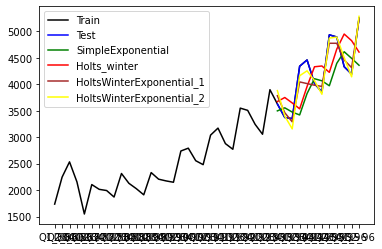

In [118]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')